### Importing Libraries

In [1]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import pickle
from matplotlib import style
import time

style.use("ggplot")

In [2]:
SIZE = 20
EPISODES = 25000

### Hyperparameters for our Model

In [3]:
#Can be changed
MOVE_PENALTY = 1  
ENEMY_PENALTY = 300  
FOOD_REWARD = 25  

### Epsilon 


In [4]:
epsilon = 0.5 
epsilon_decay = 0.9999  
SHOW_EVERY = 1000  

### Hyperparameters and defining player attributes

In [5]:
LEARNING_RATE = 0.1
DISCOUNT = 0.95

PLAYER = 1  # player key in dict
FOOD = 2  # food key in dict
ENEMY = 3  # enemy key in dict

#dict for giving colours to the objects
d = {1: (255, 0, 0),  # blueish color
     2: (0, 255, 0),  # green
     3: (0, 0, 255)}  # red

### Objects

In [6]:
class squares:
    def __init__(self):
        self.x = np.random.randint(0, SIZE)
        self.y = np.random.randint(0, SIZE)
        
    def __str__(self):
        return f"{self.x}, {self.y}"
    
    def __sub__(self, other):
        return (self.x-other.x, self.y-other.y)

### Defining the Action States


In [7]:
#Four possible actions up down left right or 0 1 2 3
def action(self,choice):
    if(choice == 0):
        self.move(x=1,y=1)
    elif choice == 1:
        self.move(x=-1, y=-1)
    elif choice == 2:
        self.move(x=-1, y=1)
    elif choice == 3:
        self.move(x=1, y=-1)

### Defining the Move Function
* Here we have 3 things to cover
1. If X is not given any value
2. If Y isn't given any value
3. If both X and Y are out of bounds

In [8]:
def move(self, x=False, y=False):

# If no value for x, move randomly
    if not x:
        self.x += np.random.randint(-1, 2)
    else:
        self.x += x

# If no value for y, move randomly
    if not y:
        self.y += np.random.randint(-1, 2)
    else:
        self.y += y


# If we are out of bounds, fix!
    if self.x < 0:
        self.x = 0
    elif self.x > SIZE-1:
        self.x = SIZE-1
    if self.y < 0:
        self.y = 0
    elif self.y > SIZE-1:
        self.y = SIZE-1

### Testing

In [9]:
class squares:
    def __init__(self):
        self.x = np.random.randint(0, SIZE)
        self.y = np.random.randint(0, SIZE)
        
    def __str__(self):
        return f"{self.x}, {self.y}"
    
    def __sub__(self, other):
        return (self.x-other.x, self.y-other.y)
    
    
    def action(self,choice):
        if(choice == 0):
            self.move(x=1,y=1)
        elif choice == 1:
            self.move(x=-1, y=-1)
        elif choice == 2:
            self.move(x=-1, y=1)
        elif choice == 3:
            self.move(x=1, y=-1)
            
            
    def move(self, x=False, y=False):

# If no value for x, move randomly
        if not x:
            self.x += np.random.randint(-1, 2)
        else:
            self.x += x

    # If no value for y, move randomly
        if not y:
            self.y += np.random.randint(-1, 2)
        else:
            self.y += y


    # If we are out of bounds, fix!
        if self.x < 0:
            self.x = 0
        elif self.x > SIZE-1:
            self.x = SIZE-1
        if self.y < 0:
            self.y = 0
        elif self.y > SIZE-1:
            self.y = SIZE-1

In [10]:
player = squares()
food = squares()

print(player)
print(food)
print(player-food)
player.move()
print(player-food)
player.action(2)
print(player-food)

11, 2
12, 16
(-1, -14)
(-2, -14)
(-3, -13)


### Q-Table

In [11]:
#If we have to load a q_table then this code isn't necessary
start_q_table = None
if start_q_table is None:
    # initialize the q-table#
    q_table = {}
    for p in range(-SIZE+1, SIZE):
        for q in range(-SIZE+1, SIZE):
            for r in range(-SIZE+1, SIZE):
                    for s in range(-SIZE+1, SIZE):
                        q_table[((p,q), (r,s))] = [np.random.uniform(-5, 0) for i in range(4)]
else:
    with open(start_q_table, "rb") as f:
        q_table = pickle.load(f)
        

1. For every position starting from (-19,-19),(-19,-19) to (19,19),(19,19) we will have q_values ranging from -5 to 0 depicting actions

#### If we have a Q_Table already saved we can load it using

1. Used with above code

else:
    with open(start_q_table, "rb") as f:
        q_table = pickle.load(f)

### Checking values in Q_Table

In [12]:
print(q_table[((-19,-19),(-19,-19))])

[-2.620654925203308, -2.3482495799622685, -0.17494630109122866, -3.9320902918632017]


In [13]:
print(q_table[((19,19),(19,19))])

[-2.3757055755647905, -4.401390206166563, -3.2147299840474752, -4.821056138521903]


### Dont run these Cells
Only for understanding the code

1. Step is to create a list which will store the records for every episode

rewards_per_episode = []
#Creating 3 squares for food player and enemy(will be created in every episode)
for episode in range(EPISODES):
    player = squares()
    food = squares()
    enemy = squares()


2. Printing 1000th Episode and the Epsilon(Decay)

if episode % SHOW_EVERY == 0:
    print(f"on episode: {episode}, epsilon is {epsilon}")
    show = True
else:
    show = False

3. Finding reward before appending it.
rewards_per_episode=0

4. Finding the position and moving the player according to the epsilon value

for i in range(200):
    obs = (player-food, player-enemy)
####print(obs)
    if np.random.random() > epsilon:
    
####ACTION
        action = np.argmax(q_table[obs])
    else:
        action = np.random.randint(0, 4)
        
####Perform the Action
    player.action(action)



5. Describing the Rewards mechanism

###IF players position == enemies position both x and Y co-ordinate will give a negative reward
if player.x == enemy.x and player.y == enemy.y:
    reward = -ENEMY_PENALTY
    
###IF players position == foods position +ve reward
elif player.x == food.x and player.y == food.y:
    reward = FOOD_REWARD
    
###Else negative reward.
else:
    reward = -MOVE_PENALTY


6. Now we have our move rewards set we can move on to the Q_Table

###New Observative position
new_obs = (player - food, player - enemy)  

###max future Q_Value
max_future_q = np.max(q_table[new_obs])

###Current Q_Value
current_q = q_table[obs][action]

###Now if the reward == food reward which means max reward will update the Q_Table otherwise will use the Q_Function to find the new Q_Value

if reward == FOOD_REWARD:
    new_q = FOOD_REWARD
else:
    new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

7. We Don't want to see it for each episode as it would be hectic for 25000 episodes so we will see it only if it is in show:


if show:


###starts a rbg of 20,20,3 size
env = np.zeros((SIZE, SIZE, 3), dtype=np.uint8) 

###Sets the food, player and enemy location according to their respective colours
env[food.x][food.y] = d[FOOD_N]  #green color
env[player.x][player.y] = d[PLAYER_N]  #blue
env[enemy.x][enemy.y] = d[ENEMY_N]  #red


###Reading the image as RGB as the default is BGR
img = Image.fromarray(env, 'RGB')  


###Resizing the frame for better visualization
img = img.resize((300, 300))
cv2.imshow("image", np.array(img))


###Code to quit. We used oxFF == ord('q') to convert the hexa number to 8 bit integer
if reward == FOOD_REWARD or reward == -ENEMY_PENALTY:   reasons or not.
    if cv2.waitKey(500) & 0xFF == ord('q'):
        break
else:
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break



8. Finally appending the reward and printing it and decaying the epsilon value

episode_reward += reward
if reward == FOOD_REWARD or reward == -ENEMY_PENALTY:
    break

#print(episode_reward)
rewards_per_episode.append(episode_reward)
epsilon *= epsilon_decay

## Don't run the above Cells


## Executable Cells Below

### Iterating over all episodes

In [14]:
rewards_per_episode = []

for episode in range(EPISODES):
    player = squares()
    food = squares()
    enemy = squares()
    
    if episode % SHOW_EVERY == 0:
        print(f"on episode: {episode}, epsilon is {epsilon}")
        show = True
    else:
        show = False
        
    episode_reward = 0
    for i in range(200):
        obs = (player-food, player-enemy)
        #print(obs)
        if np.random.random() > epsilon:
            # GET THE ACTION
            action = np.argmax(q_table[obs])
        else:
            action = np.random.randint(0, 4)
        # Take the action!
        player.action(action)


        if player.x == enemy.x and player.y == enemy.y:
            reward = -ENEMY_PENALTY
        elif player.x == food.x and player.y == food.y:
            reward = FOOD_REWARD
        else:
            reward = -MOVE_PENALTY
            

        # first we need to obs immediately after the move.
        new_obs = (player-food, player-enemy)
        max_future_q = np.max(q_table[new_obs])
        current_q = q_table[obs][action]
        
        

        if reward == FOOD_REWARD:
            new_q = FOOD_REWARD
        else:
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
        q_table[obs][action] = new_q

        
        
        if show:
            env = np.zeros((SIZE, SIZE, 3), dtype=np.uint8)  # starts an rbg of SIZExSIZEx3
            
            env[food.x][food.y] = d[FOOD]  # sets the food location tile to green color
            
            env[player.x][player.y] = d[PLAYER]  # sets the player tile to blue
            
            env[enemy.x][enemy.y] = d[ENEMY]  # sets the enemy location to red
            
            img = Image.fromarray(env, 'RGB')  # reading to rgb. Apparently. Even tho color definitions are bgr
            
            img = img.resize((500, 500))  # resizing so we can see our agent.
            
            cv2.imshow("image", np.array(img))  # Display
            
            if reward == FOOD_REWARD or reward == -ENEMY_PENALTY:  
                if cv2.waitKey(500) & 0xFF == ord('q'): #To close
                    break
            else:
                if cv2.waitKey(1) & 0xFF == ord('q'): 
                    break

        episode_reward += reward
        if reward == FOOD_REWARD or reward == -ENEMY_PENALTY:
            break

    #print(episode_reward)
    rewards_per_episode.append(episode_reward)
    epsilon *= epsilon_decay

on episode: 0, epsilon is 0.5
on episode: 1000, epsilon is 0.4524164467792781
on episode: 2000, epsilon is 0.40936128263277455
on episode: 3000, epsilon is 0.370403553875455
on episode: 4000, epsilon is 0.33515331943750076
on episode: 5000, epsilon is 0.3032577478123883
on episode: 6000, epsilon is 0.27439758544713416
on episode: 7000, epsilon is 0.2482839612256115
on episode: 8000, epsilon is 0.22465549505995064
on episode: 9000, epsilon is 0.2032756816489254
on episode: 10000, epsilon is 0.1839305232164846
on episode: 11000, epsilon is 0.16642638753571107
on episode: 12000, epsilon is 0.15058806979843486
on episode: 13000, epsilon is 0.13625703893111527
on episode: 14000, epsilon is 0.12328985080376159
on episode: 15000, epsilon is 0.1115567124491704
on episode: 16000, epsilon is 0.10094018292126271
on episode: 17000, epsilon is 0.09133399778897615
on episode: 18000, epsilon is 0.08264200549966999
on episode: 19000, epsilon is 0.07477720496574845
on episode: 20000, epsilon is 0.06766

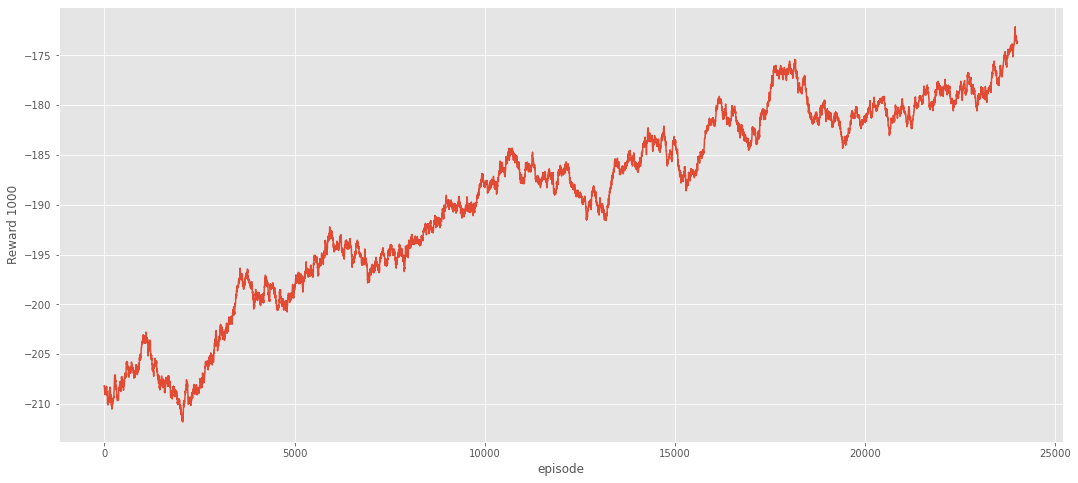

In [15]:
moving_avg = np.convolve(rewards_per_episode, np.ones((SHOW_EVERY,))/SHOW_EVERY, mode='valid')
plt.figure(figsize=(18,8))
plt.plot([i for i in range(len(moving_avg))], moving_avg)
plt.ylabel(f"Reward {SHOW_EVERY}")
plt.xlabel("episode")
plt.show()

with open(f"qtable", "wb") as f:
    pickle.dump(q_table, f)